# Wendling Model Tutorial

This notebook demonstrates how to use the Wendling Model from neurolib.

## Contents
1. Basic Setup
2. Single Node Example
3. Six Activity Types
4. Multi-Node Networks
5. Parameter Effects

## 1. Basic Setup

Import necessary libraries:

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from neurolib.models.wendling import WendlingModel
from neurolib.models.wendling.STANDARD_PARAMETERS import WENDLING_STANDARD_PARAMS

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
print('✓ Setup complete!')
print(f'✓ Loaded {len(WENDLING_STANDARD_PARAMS)} verified parameter sets')

✓ Setup complete!
✓ Loaded 6 verified parameter sets


## 2. Single Node Example

### Key Parameters:
- **heterogeneity**: Parameter variation (0 = no variation)
- **random_init**: Initial conditions (False = zero initial state)
- **seed**: Random seed for reproducibility

**Note**: For single node, you do NOT need to specify `Cmat` or `Dmat` - they will be automatically created!

In [109]:
# Create a single node model (no need for Cmat/Dmat!)
model = WendlingModel(
    heterogeneity=0.0,    # Scalar mode (no variation)
    random_init=False,     # Zero initial conditions
    seed=42                # For reproducibility
)

# Set simulation parameters
model.params['duration'] = 10000  # 10 seconds (in ms)
model.params['dt'] = 0.1          # Time step of 0.1 ms

# Set Type3 parameters from STANDARD_PARAMETERS
type3_params = WENDLING_STANDARD_PARAMS['Type3']['params']
model.params['B'] = type3_params['B']
model.params['G'] = type3_params['G']
model.params['A'] = type3_params['A']
model.params['p_mean'] = type3_params['p_mean']
model.params['p_sigma'] = type3_params['p_sigma']
model.params['K_gl'] = 0.0  # No global coupling

print(f"Model configured: {WENDLING_STANDARD_PARAMS['Type3']['name']}")
print(f"B={model.params['B']}, G={model.params['G']}, p_sigma={model.params['p_sigma']}")

Model configured: Type 3: Sustained SWD (Spike-Wave Discharge)
B=25, G=15, p_sigma=2.0


In [110]:
# Run simulation
print('Running simulation...')
model.run()
print('✓ Simulation completed!')

# Extract the signal (PSP - Post-Synaptic Potential)
signal = model.y1[0, :] - model.y2[0, :] - model.y3[0, :]
time = np.arange(len(signal)) * model.params['dt']

print(f'Signal shape: {signal.shape}')
print(f'Time range: {time[0]:.1f} - {time[-1]:.1f} ms')

Running simulation...
✓ Simulation completed!
Signal shape: (100000,)
Time range: 0.0 - 9999.9 ms


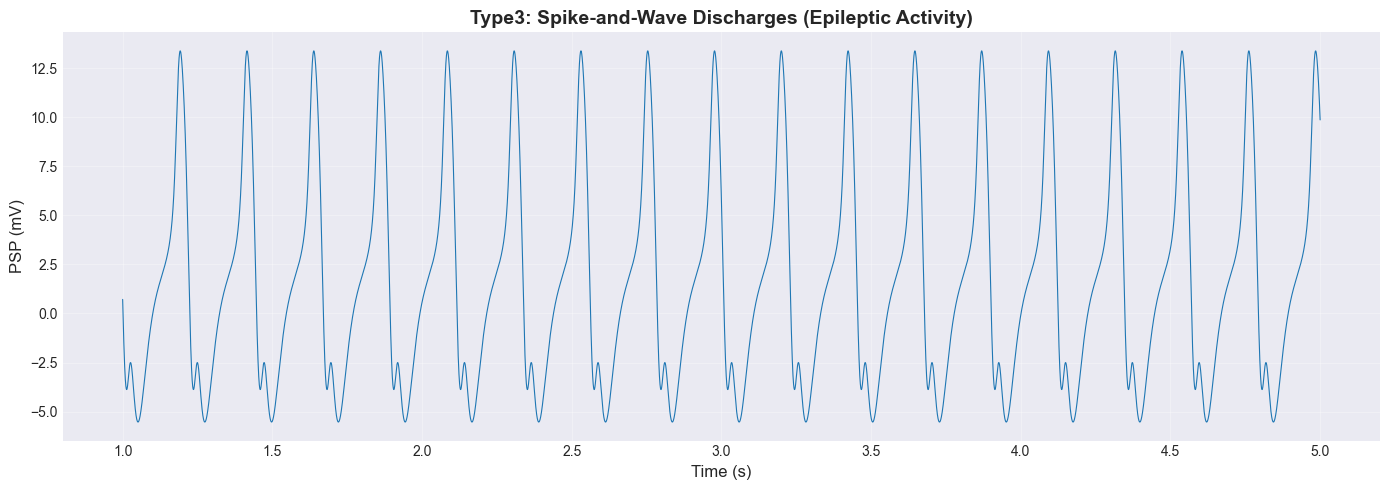

Note: First 1000 ms removed to skip transient


In [111]:
# Visualize the result (skip first 1 second to remove transient)
skip_samples = 10000  # Skip 1000 ms (at dt=0.1)
plt.figure(figsize=(14, 5))
plt.plot(time[skip_samples:50000]/1000, signal[skip_samples:50000], linewidth=0.8)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('PSP (mV)', fontsize=12)
plt.title('Type3: Spike-and-Wave Discharges (Epileptic Activity)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Note: First {skip_samples*0.1:.0f} ms removed to skip transient')

## 3. Six Activity Types (Single-Node Comparison)

The Wendling model can reproduce 6 different brain activity patterns (from STANDARD_PARAMETERS.py):

| Type | B | G | p_sigma | Description |
|------|---|---|---------|-------------|
| Type1 | 50 | 15 | 2.0 | Background activity (1-7 Hz) |
| Type2 | 40 | 15 | 2.0 | Sporadic spikes (1-5 Hz) |
| Type3 | 25 | 15 | 2.0 | Spike-and-Wave (3-6 Hz, epileptic) |
| Type4 | 10 | 15 | 2.0 | Alpha rhythm (8-13 Hz) |
| Type5 | 5 | 25 | 2.0 | Low Voltage Fast Activity (10-20 Hz) |
| Type6 | 15 | 0 | 2.0 | Quasi-sinusoidal (9-13 Hz) |

**Note**: All types use `p_sigma=2.0` (verified parameters) to show intrinsic dynamics.

✓ Type 1: Background activity
✓ Type 2: Sporadic spikes
✓ Type 3: Sustained SWD (Spike-Wave Discharge)
✓ Type 4: Alpha-like rhythm
✓ Type 5: Low-voltage fast activity (LVFA)
✓ Type 6: Quasi-sinusoidal


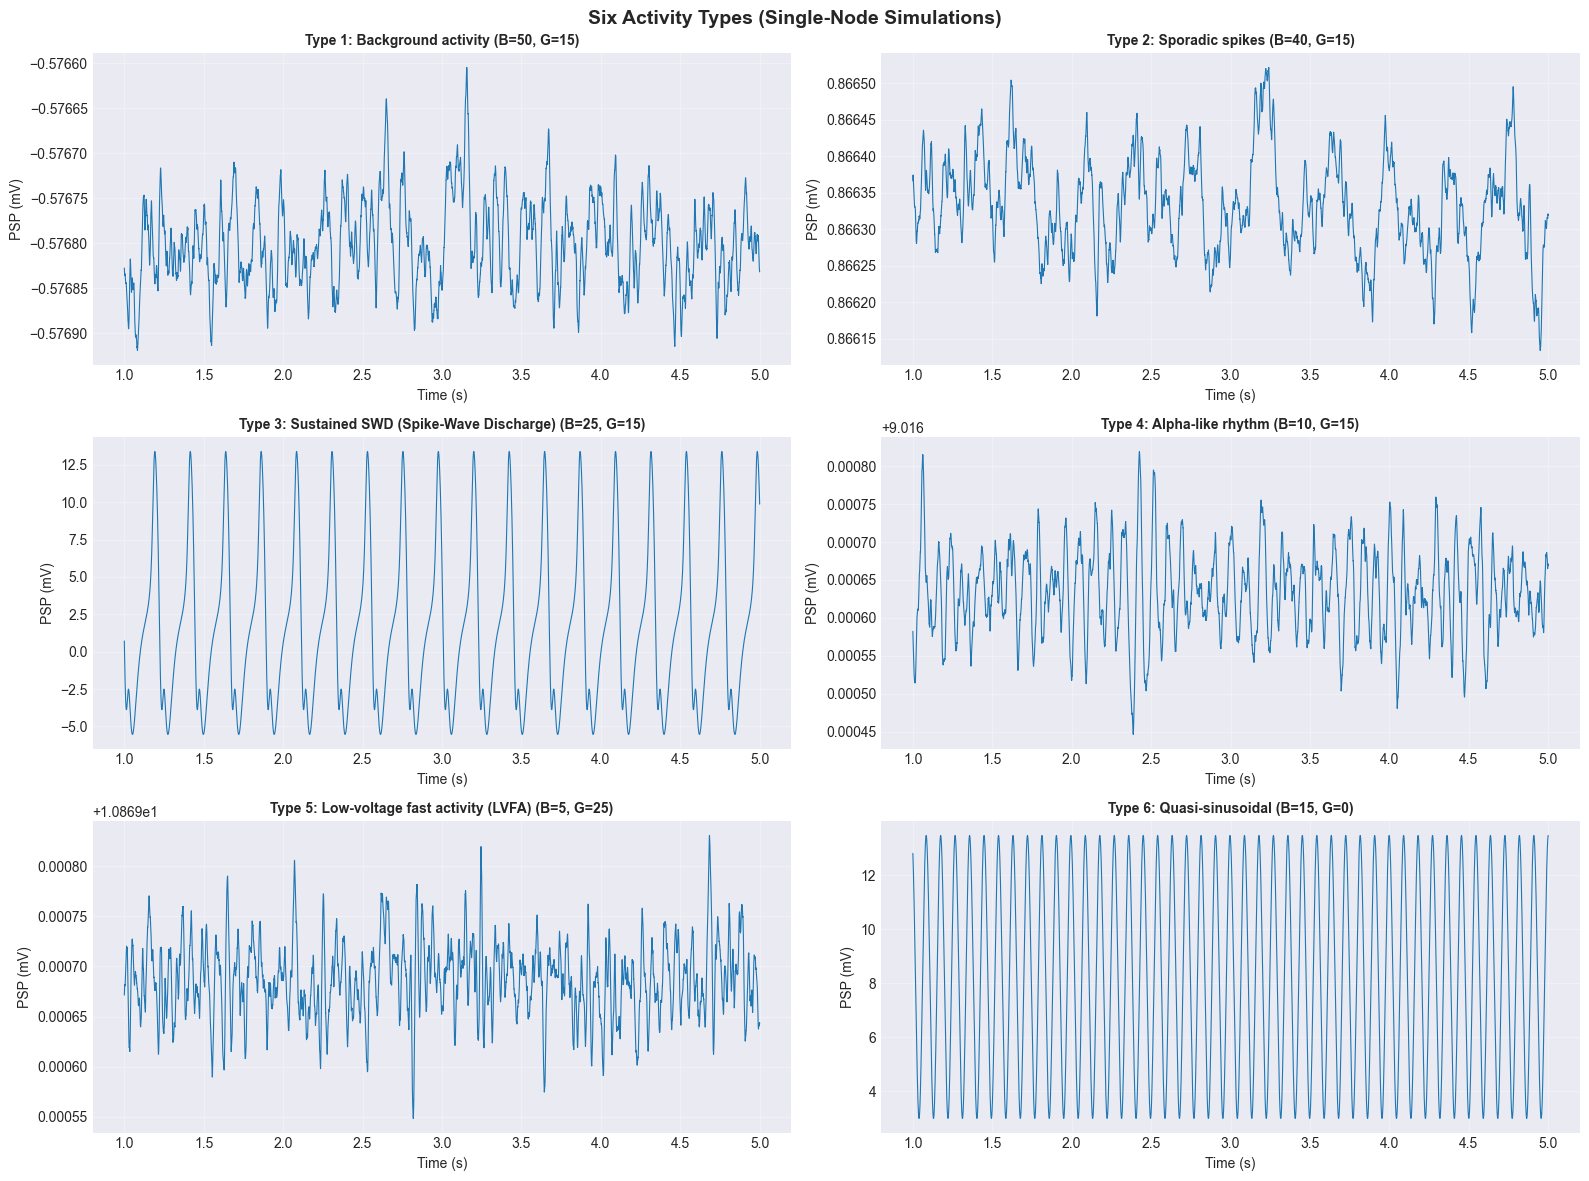


✓ All 6 types simulated with verified parameters


In [112]:
# Simulate and visualize all 6 types (single-node, for comparison)
def simulate_type(type_name):
    """Simulate a specific activity type using verified parameters"""
    type_info = WENDLING_STANDARD_PARAMS[type_name]
    params = type_info['params']
    
    m = WendlingModel(heterogeneity=0.0, random_init=False, seed=42)
    m.params['B'] = params['B']
    m.params['G'] = params['G']
    m.params['A'] = params['A']
    m.params['p_mean'] = params['p_mean']
    m.params['p_sigma'] = params['p_sigma']
    m.params['duration'] = 10000
    m.params['dt'] = 0.1
    m.params['K_gl'] = 0.0
    
    m.run()
    sig = m.y1[0, :] - m.y2[0, :] - m.y3[0, :]
    return np.arange(len(sig)) * m.params['dt'], sig, type_info

# Simulate all 6 types
type_names = ['Type1', 'Type2', 'Type3', 'Type4', 'Type5', 'Type6']
results = {}
for type_name in type_names:
    t, sig, info = simulate_type(type_name)
    results[type_name] = (t, sig, info)
    print(f"✓ {info['name']}")

# Visualize (skip first 1 second to remove transient)
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

skip_samples = 10000
for idx, type_name in enumerate(type_names):
    t, sig, info = results[type_name]
    t_plot = t[skip_samples:50000] / 1000
    sig_plot = sig[skip_samples:50000]
    
    axes[idx].plot(t_plot, sig_plot, linewidth=0.8)
    axes[idx].set_xlabel('Time (s)')
    axes[idx].set_ylabel('PSP (mV)')
    axes[idx].set_title(f"{info['name']} (B={info['params']['B']}, G={info['params']['G']})", 
                        fontweight='bold', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Six Activity Types (Single-Node Simulations)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f'\n✓ All {len(results)} types simulated with verified parameters')

## 4. Multi-Node Network

### Important for Multi-Node:
- **Cmat & Dmat**: NOW you need connectivity matrices! (for single node, they're optional)
- **heterogeneity > 0**: Enables different parameters for each node
- **random_init = True**: Prevents signal decay (CRITICAL!)
- **K_gl**: Controls coupling strength between nodes

In [113]:
# Create a 6-node network with random connectivity
N = 6

# ============================================================================
# Choose Connectivity Type: Binary (0/1) or Weighted (0 to 1)
# ============================================================================
CONNECTIVITY_TYPE = 'weighted'  # 'binary' or 'weighted'

np.random.seed(42)  # For reproducibility

if CONNECTIVITY_TYPE == 'binary':
    # Binary connectivity: either connected (1) or not connected (0)
    p_connection = 0.5  # Probability of connection
    Cmat = (np.random.rand(N, N) < p_connection).astype(float)
    np.fill_diagonal(Cmat, 0)
    # Make symmetric
    Cmat = (Cmat + Cmat.T) / 2
    Cmat = (Cmat > 0).astype(float)
    
    print("Binary Connectivity Matrix (0 or 1):")
    print(Cmat.astype(int))
    
elif CONNECTIVITY_TYPE == 'weighted':
    # Weighted connectivity: connection strength from 0 to 1
    Cmat = np.random.rand(N, N)  # Random values between 0 and 1
    np.fill_diagonal(Cmat, 0)     # Self-connections = 0
    # Make symmetric
    Cmat = (Cmat + Cmat.T) / 2
    
    print("Weighted Connectivity Matrix (0 to 1):")
    print(np.round(Cmat, 2))  # Round to 2 decimals for display
    print(f"\nConnection strength range: {Cmat[Cmat>0].min():.3f} to {Cmat.max():.3f}")

# ============================================================================
# Delay Matrix (Dmat)
# ============================================================================
Dmat = np.zeros((N, N))  # All delays = 0 ms (no transmission delays)

print(f"\nDelay Matrix (Dmat): All zeros (no delays)")
print("="*60)

# ============================================================================
# Create WendlingModel
# ============================================================================
model_multi = WendlingModel(
    Cmat=Cmat, Dmat=Dmat,
    heterogeneity=0.01,  # Small value to enable vector mode
    random_init=True,    # CRITICAL for multi-node!
    seed=42
)

# ============================================================================
# Randomly assign activity types to each node
# ============================================================================

# Randomly pick one type for each node
available_types = ['Type1', 'Type2', 'Type3', 'Type4', 'Type5', 'Type6']
assigned_types = np.random.choice(available_types, size=N, replace=True)

print(f"\nRandomly Assigned Activity Types:")
B_values = []
G_values = []
for i, type_name in enumerate(assigned_types):
    params = WENDLING_STANDARD_PARAMS[type_name]['params']
    B_values.append(params['B'])
    G_values.append(params['G'])
    print(f"  Node {i}: {WENDLING_STANDARD_PARAMS[type_name]['name']} (B={params['B']}, G={params['G']})")

# Set parameters
model_multi.params['B'] = np.array(B_values)
model_multi.params['G'] = np.array(G_values)
model_multi.params['A'] = np.array([5.0] * N)
model_multi.params['p_mean'] = np.array([90.0] * N)
model_multi.params['p_sigma'] = 2.0  # All types use 2.0 (verified)
model_multi.params['duration'] = 10000
model_multi.params['dt'] = 0.1
model_multi.params['K_gl'] = 0.15  # Global coupling strength

print(f'\nNetwork Configuration:')
print(f'  Connectivity: {CONNECTIVITY_TYPE}')
print(f'  Nodes: {N}')
print(f'  Node types (B values): {model_multi.params["B"]}')
print(f'  Global coupling K_gl = {model_multi.params["K_gl"]}')

Weighted Connectivity Matrix (0 to 1):
[[0.   0.5  0.78 0.52 0.31 0.38]
 [0.5  0.   0.41 0.5  0.4  0.57]
 [0.78 0.41 0.   0.4  0.25 0.29]
 [0.52 0.5  0.4  0.   0.4  0.66]
 [0.31 0.4  0.25 0.4  0.   0.51]
 [0.38 0.57 0.29 0.66 0.51 0.  ]]

Connection strength range: 0.252 to 0.782

Delay Matrix (Dmat): All zeros (no delays)

Randomly Assigned Activity Types:
  Node 0: Type 5: Low-voltage fast activity (LVFA) (B=5, G=25)
  Node 1: Type 2: Sporadic spikes (B=40, G=15)
  Node 2: Type 5: Low-voltage fast activity (LVFA) (B=5, G=25)
  Node 3: Type 2: Sporadic spikes (B=40, G=15)
  Node 4: Type 1: Background activity (B=50, G=15)
  Node 5: Type 4: Alpha-like rhythm (B=10, G=15)

Network Configuration:
  Connectivity: weighted
  Nodes: 6
  Node types (B values): [ 5 40  5 40 50 10]
  Global coupling K_gl = 0.15


In [114]:
# Run multi-node simulation
print('Running multi-node simulation...')
model_multi.run()
print('✓ Simulation completed!')

# Extract signals from all nodes
signals = model_multi.y1 - model_multi.y2 - model_multi.y3
time = np.arange(signals.shape[1]) * model_multi.params['dt']

print(f'Signals shape: {signals.shape}')
print(f'{signals.shape[0]} nodes, {signals.shape[1]} time steps')

Running multi-node simulation...
✓ Simulation completed!
Signals shape: (6, 100000)
6 nodes, 100000 time steps


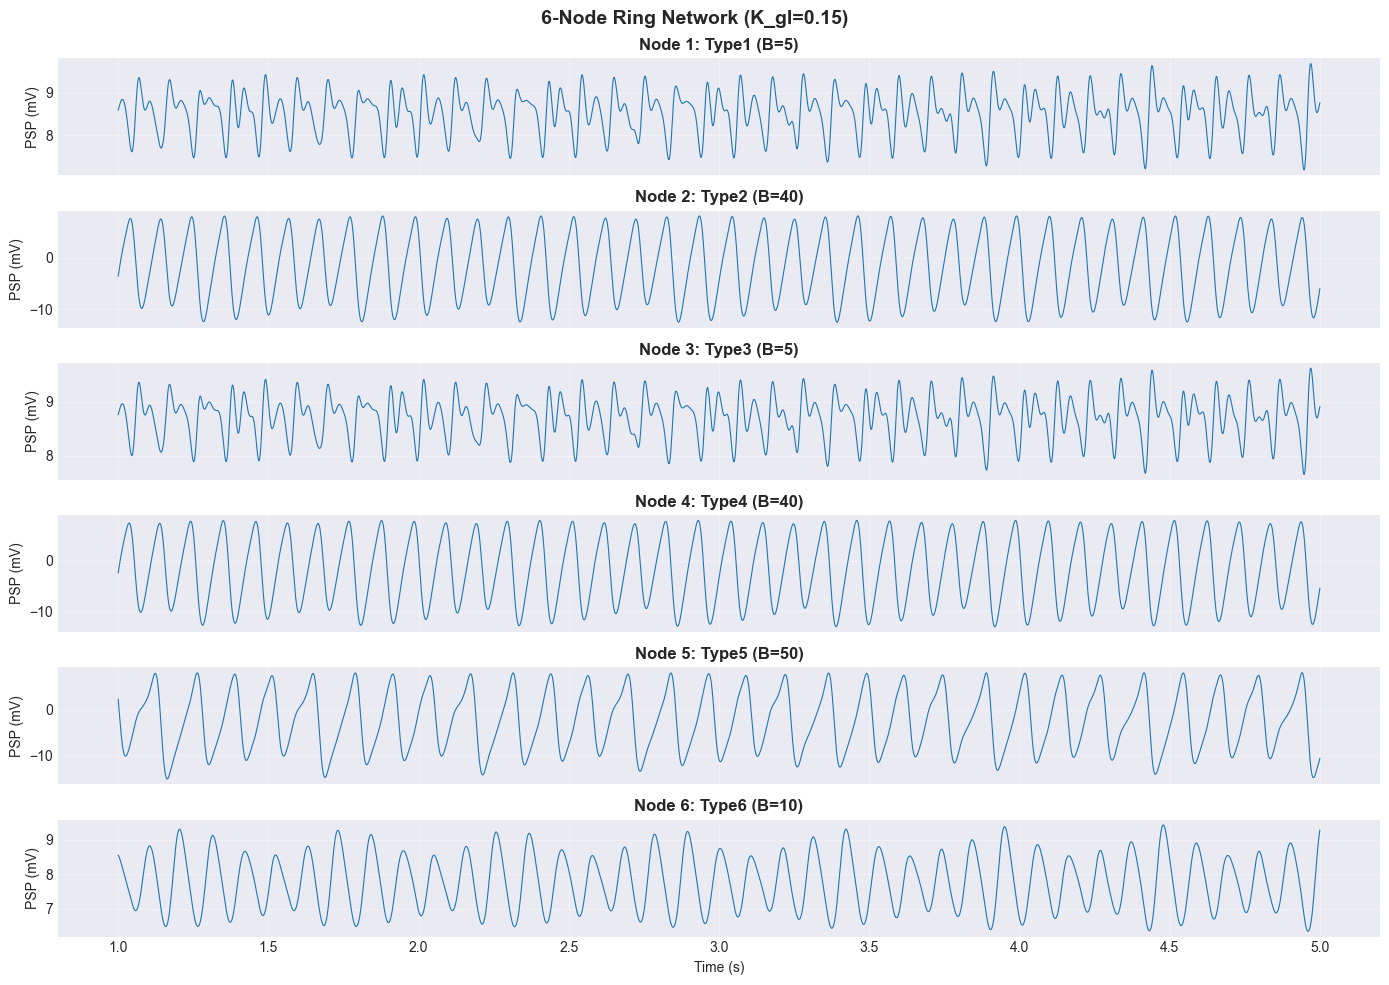

Note: Nodes are connected in a ring (each node connected to 2 neighbors)
Coupling strength K_gl = 0.15


In [115]:
# Visualize all nodes in the network
types = ['Type1', 'Type2', 'Type3', 'Type4', 'Type5', 'Type6']
fig, axes = plt.subplots(N, 1, figsize=(14, 10))

# Skip first 1000 ms (10000 samples at dt=0.1) to remove transient
skip_samples = 10000
for i in range(N):
    t_plot = time[skip_samples:50000] / 1000  # Convert to seconds
    sig_plot = signals[i, skip_samples:50000]
    
    axes[i].plot(t_plot, sig_plot, linewidth=0.8)
    axes[i].set_ylabel('PSP (mV)')
    axes[i].set_title(f'Node {i+1}: {types[i]} (B={model_multi.params["B"][i]})', fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    if i < N-1:
        axes[i].set_xticklabels([])

axes[-1].set_xlabel('Time (s)')
plt.suptitle(f'6-Node Ring Network (K_gl={model_multi.params["K_gl"]})', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f'Note: Nodes are connected in a ring (each node connected to 2 neighbors)')
print(f'Coupling strength K_gl = {model_multi.params["K_gl"]}')

# Test different coupling strengths on a 2-node network

In [116]:
coupling_values = [0.0, 0.1, 0.3]
results_coupling = {}

for k in coupling_values:
    print(f'Testing K_gl = {k}...')
    # 2-node network with bidirectional connection
    Cmat2 = np.array([[0, 1], [1, 0]])
    Dmat2 = np.zeros((2, 2))
    
    # Create model with explicit parameters
    m = WendlingModel(Cmat=Cmat2, Dmat=Dmat2, heterogeneity=0.01, random_init=True, seed=42)
    
    # Set parameters for each node
    m.params['B'] = np.array([25, 50])  # Node1: Type3, Node2: Type1
    m.params['G'] = np.array([15, 15])
    m.params['A'] = np.array([5, 5])
    m.params['p_mean'] = np.array([90, 90])
    m.params['p_sigma'] = 2.0
    m.params['duration'] = 10000
    m.params['dt'] = 0.1
    m.params['K_gl'] = k  # Set coupling strength
    
    # Run simulation
    m.run()
    results_coupling[k] = m.y1 - m.y2 - m.y3

print('\n✓ Coupling tests complete!')

Testing K_gl = 0.0...
Testing K_gl = 0.1...
Testing K_gl = 0.3...

✓ Coupling tests complete!


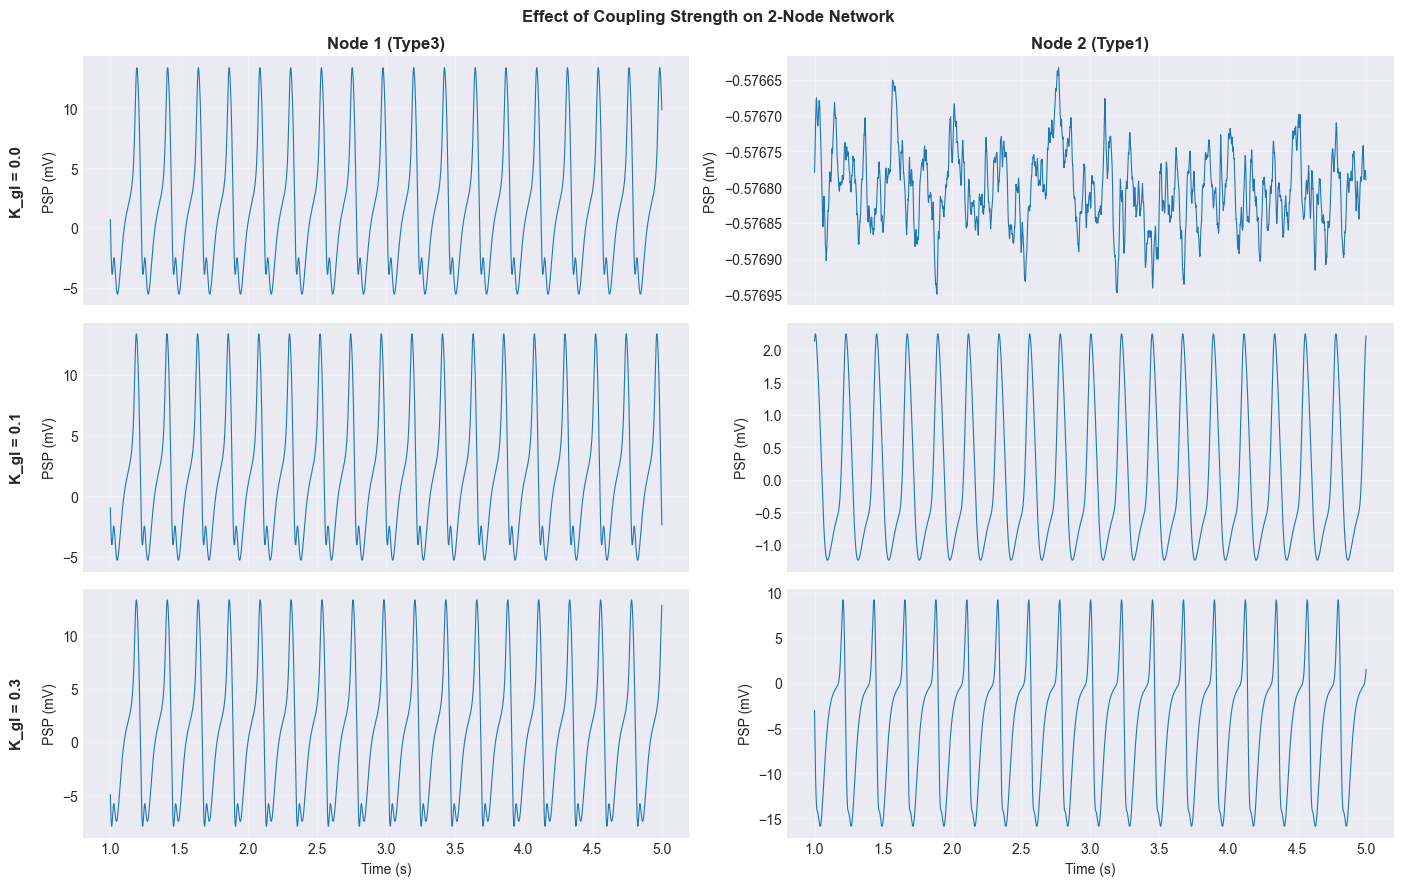

In [117]:
# Visualize coupling effects (skip first 1 second to remove transient)
fig, axes = plt.subplots(len(coupling_values), 2, figsize=(14, 9))

skip_samples = 10000  # Skip 1000 ms
for row, k in enumerate(coupling_values):
    sigs = results_coupling[k]
    t = np.arange(sigs.shape[1]) * 0.1  # time in ms
    
    for col in range(2):
        t_plot = t[skip_samples:50000] / 1000  # Convert to seconds
        sig_plot = sigs[col, skip_samples:50000]
        
        axes[row, col].plot(t_plot, sig_plot, linewidth=0.8)
        axes[row, col].set_ylabel('PSP (mV)')
        axes[row, col].grid(True, alpha=0.3)
        if row == 0:
            node_names = ['Node 1 (Type3)', 'Node 2 (Type1)']
            axes[row, col].set_title(node_names[col], fontweight='bold')
        if row < len(coupling_values)-1:
            axes[row, col].set_xticklabels([])
    
    # Add K_gl label on the left
    axes[row, 0].text(
        -0.12, 0.5, f'K_gl = {k}',
        transform=axes[row, 0].transAxes,
        fontsize=11, fontweight='bold',
        rotation=90, va='center'
    )

axes[-1, 0].set_xlabel('Time (s)')
axes[-1, 1].set_xlabel('Time (s)')
plt.suptitle('Effect of Coupling Strength on 2-Node Network', fontweight='bold')
plt.tight_layout()
plt.show()